## Final Project Submission

Please fill out:
* Student name: Elizabeth Gichure
* Student pace: part-time
* Scheduled project review date/time: 26th July 2025
* Instructor name: Christine Kirimi


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Exploration

In [2]:
# Importing the data using pandas and read the top 5 rows
aviation_data = pd.read_csv("Aviation_Data.csv",low_memory=False)
aviation_data.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Number of columns and number of rows 
aviation_data.shape

(90348, 31)

In [4]:
# Assess the column type for each column
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Check the columns we have 
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
# check the percentage of missing values in each column
missing_percentage = (aviation_data.isna().sum() / len(aviation_data)) * 100
print(missing_percentage)

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

In [7]:
# Step 1: Select the desired columns 
selected_aviation_data = aviation_data[[ 
    'Make', 'Model', 'Aircraft.damage', 'Total.Fatal.Injuries',
    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
    'Injury.Severity','Country', 'Event.Date','Aircraft.Category'
]]

# Step 2: Convert only string columns to lowercase using .loc
for col in selected_aviation_data.select_dtypes(include='object').columns:
    selected_aviation_data.loc[:, col] = selected_aviation_data[col].str.title()

selected_aviation_data.head(4)

,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Injury.Severity,Country,Event.Date,Aircraft.Category
0,Stinson,108-3,Destroyed,2.0,0.0,0.0,0.0,Fatal(2),United States,1948-10-24,NaN
1,Piper,Pa24-180,Destroyed,4.0,0.0,0.0,0.0,Fatal(4),United States,1962-07-19,NaN
2,Cessna,172M,Destroyed,3.0,NaN,NaN,NaN,Fatal(3),United States,1974-08-30,NaN
3,Rockwell,112,Destroyed,2.0,0.0,0.0,0.0,Fatal(2),United States,1977-06-19,NaN


# Step 2:Data Cleaning -  Dealing with missing values

In [8]:
# Drop rows where Aircraft.Category is NaN. This helps reduce the amount of data, which can otherwise make visualization more difficult or cluttered
selected_aviation_data = selected_aviation_data.dropna(subset=['Aircraft.Category'])
aviation_data.head(4)



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000


In [9]:
# first, we will check the mode for each categorical column. We will put the mode of each column list
categorical = selected_aviation_data[['Aircraft.Category','Make', 'Model', 'Aircraft.damage', 'Injury.Severity']]
for column in categorical:
    mode = categorical[column].mode()
    print(f"{column}: {mode[0]}")

Aircraft.Category: Airplane
Make: Cessna
Model: 172
Aircraft.damage: Substantial
Injury.Severity: Non-Fatal


In [10]:
# We need to replace the NAN with the modes
categorical_columns = ['Make', 'Model', 'Aircraft.damage', 'Injury.Severity']

for column in categorical_columns:
    mode = selected_aviation_data[column].mode()[0]
    selected_aviation_data.loc[:, column] = selected_aviation_data[column].fillna(mode)

selected_aviation_data.isna().sum()

Make                         0
Model                        0
Aircraft.damage              0
Total.Fatal.Injuries      3711
Total.Serious.Injuries    3720
Total.Minor.Injuries      3332
Total.Uninjured           1080
Injury.Severity              0
Country                     12
Event.Date                   0
Aircraft.Category            0
dtype: int64

In [11]:
# Mean of each numerical columns
numerical = selected_aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
for column in numerical:
    average = round(numerical[column].mean())
    print(f"{column}: {average}")

Total.Fatal.Injuries: 1
Total.Serious.Injuries: 0
Total.Minor.Injuries: 0
Total.Uninjured: 6


In [12]:
# Replace all the NAN with the mean values listed above
# We need to replace the NAN with the mode
numerical_columns = [['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]

for column in numerical_columns:
    mean = selected_aviation_data[column].mean()
    selected_aviation_data.loc[:, column] = selected_aviation_data[column].fillna(mean)

In [13]:
# We dropped the NAN for both the event.date and country

selected_aviation_data = selected_aviation_data.dropna(subset=['Event.Date', 'Country'])
selected_aviation_data.isna().sum()

Make                      0
Model                     0
Aircraft.damage           0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Injury.Severity           0
Country                   0
Event.Date                0
Aircraft.Category         0
dtype: int64

In [14]:
# Convert the 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured' into integers.This has only been done for numerical columns
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

selected_aviation_data[injury_columns] = selected_aviation_data[injury_columns].round(0).astype(int)
selected_aviation_data.head(4)

,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Injury.Severity,Country,Event.Date,Aircraft.Category
5,Mcdonnell Douglas,Dc9,Substantial,1,0,1,44,Non-Fatal,United States,1979-09-17,Airplane
7,Cessna,140,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane
8,Cessna,401B,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane
12,Bellanca,17-30A,Destroyed,0,0,1,0,Non-Fatal,United States,1982-01-02,Airplane


# Step 3: Appending columns

In [15]:
# We need to add a column called 'event_year' extracted from 'event.date', showing when the incidents occurred
# We will use this column when visualizing
selected_aviation_data['Event_Year'] = pd.to_datetime(selected_aviation_data['Event.Date'], errors='coerce').dt.year
selected_aviation_data.head(4)

,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Injury.Severity,Country,Event.Date,Aircraft.Category,Event_Year
5,Mcdonnell Douglas,Dc9,Substantial,1,0,1,44,Non-Fatal,United States,1979-09-17,Airplane,1979
7,Cessna,140,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane,1982
8,Cessna,401B,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane,1982
12,Bellanca,17-30A,Destroyed,0,0,1,0,Non-Fatal,United States,1982-01-02,Airplane,1982


In [16]:
# Combine both the Make and Model columns and remove all white noise
# Create a new column by stripping and cleaning the 'Make' and 'Model' columns, then combine them into a single column named 'Aircraft.make.and.model'
selected_aviation_data['Aircraft.make.and.model'] = (
    selected_aviation_data['Make'].str.strip() + ' ' +
    selected_aviation_data['Model'].str.strip()
).str.replace('-', '', regex=False)

# Display first 5 rows
selected_aviation_data.head(5)

,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Injury.Severity,Country,Event.Date,Aircraft.Category,Event_Year,Aircraft.make.and.model
5,Mcdonnell Douglas,Dc9,Substantial,1,0,1,44,Non-Fatal,United States,1979-09-17,Airplane,1979,Mcdonnell Douglas Dc9
7,Cessna,140,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane,1982,Cessna 140
8,Cessna,401B,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane,1982,Cessna 401B
12,Bellanca,17-30A,Destroyed,0,0,1,0,Non-Fatal,United States,1982-01-02,Airplane,1982,Bellanca 1730A
13,Cessna,R172K,Destroyed,1,0,0,0,Fatal(1),United States,1982-01-02,Airplane,1982,Cessna R172K


In [17]:
# Append a column called risk score that shows the risk score under each row 
# Calculate Risk Score (weights assigned to each factor, Fatal=1, Serious=0.5, Minor=0.2)
selected_aviation_data['Risk_Score'] = (
    selected_aviation_data['Total.Fatal.Injuries'] +
    0.5 * selected_aviation_data['Total.Serious.Injuries'] +
    0.2 * selected_aviation_data['Total.Minor.Injuries']
)

selected_aviation_data.head(5)

,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Injury.Severity,Country,Event.Date,Aircraft.Category,Event_Year,Aircraft.make.and.model,Risk_Score
5,Mcdonnell Douglas,Dc9,Substantial,1,0,1,44,Non-Fatal,United States,1979-09-17,Airplane,1979,Mcdonnell Douglas Dc9,1.2
7,Cessna,140,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane,1982,Cessna 140,0.0
8,Cessna,401B,Substantial,0,0,0,2,Non-Fatal,United States,1982-01-01,Airplane,1982,Cessna 401B,0.0
12,Bellanca,17-30A,Destroyed,0,0,1,0,Non-Fatal,United States,1982-01-02,Airplane,1982,Bellanca 1730A,0.2
13,Cessna,R172K,Destroyed,1,0,0,0,Fatal(1),United States,1982-01-02,Airplane,1982,Cessna R172K,1.0


In [18]:
# Export the selected_aviation_data as a CSV. This will be used for data visualization in Tableau
selected_aviation_data.to_csv('selected_aviation_data.csv', sep=';', index=False)


# Step 3: Data visualization

In [19]:
# Group by Aircraft.make.and.model, calculate add the Risk Score 
# Do a bar chart of Aircraft.make.and.model aganist the total risk score

risk_by_aircraft = (
    selected_aviation_data
    .groupby('Aircraft.make.and.model')
    .agg(
        Risk_Score=('Risk_Score', 'sum'),
        Appearance_Count=('Aircraft.make.and.model', 'count')  # counts how many rows per Make
    )
    .reset_index()
)

# Optional: Sort by Risk Score
risk_by_aircraft = risk_by_aircraft.sort_values(by='Risk_Score', ascending=False)

# Preview bottom 20 makes by Risk Score
print(risk_by_aircraft.tail(20))


                       Aircraft.make.and.model  Risk_Score  Appearance_Count
11    Aardema Robert John 1 Aardema Rag Wng Sp         0.0                 1
8793                         Zenith 750 Cruzer         0.0                 1
8797                              Zenith Ch250         0.0                 1
8799                           Zenith Ch610 Hd         0.0                 1
8787                  Zenair Zenith Stol Ch750         0.0                 1
8790                                Zenith 601         0.0                 1
8823                                 Zlin Z143         0.0                 1
6                                      737 800         0.0                 2
3                          2021Fx3 Llc Ccx2000         0.0                 2
7                                      777 Ff2         0.0                 1
2                  2007 Savage Air Llc Epic Lt         0.0                 1
8829        Zuber Thomas P Zuber Super Drifter         0.0                 1

In [20]:
# Group by Make and compute total Risk_Score and Appearance_Count
risk_by_aircraft = (
    selected_aviation_data
    .groupby('Aircraft.make.and.model')
    .agg(
        Risk_Score=('Risk_Score', 'sum'),
        Appearance_Count=('Aircraft.make.and.model', 'count')
    )
    .reset_index()
)

# Sort by Appearance_Count descending and then by Risk_Score ascending
high_count_low_risk = risk_by_aircraft.sort_values(
    by=['Appearance_Count', 'Risk_Score'], 
    ascending=[False, True]
)

# Preview top 10 results
print(high_count_low_risk.head(10))


     Aircraft.make.and.model  Risk_Score  Appearance_Count
2252              Cessna 172       414.8               873
2240              Cessna 152       175.9               450
1527              Boeing 737      1529.1               404
2316              Cessna 182       246.3               345
2281             Cessna 172N       222.4               315
6551              Piper Pa28       175.0               305
2288             Cessna 172S       143.8               277
2225              Cessna 150       111.7               255
6558           Piper Pa28140       170.0               239
2300              Cessna 180        76.7               237


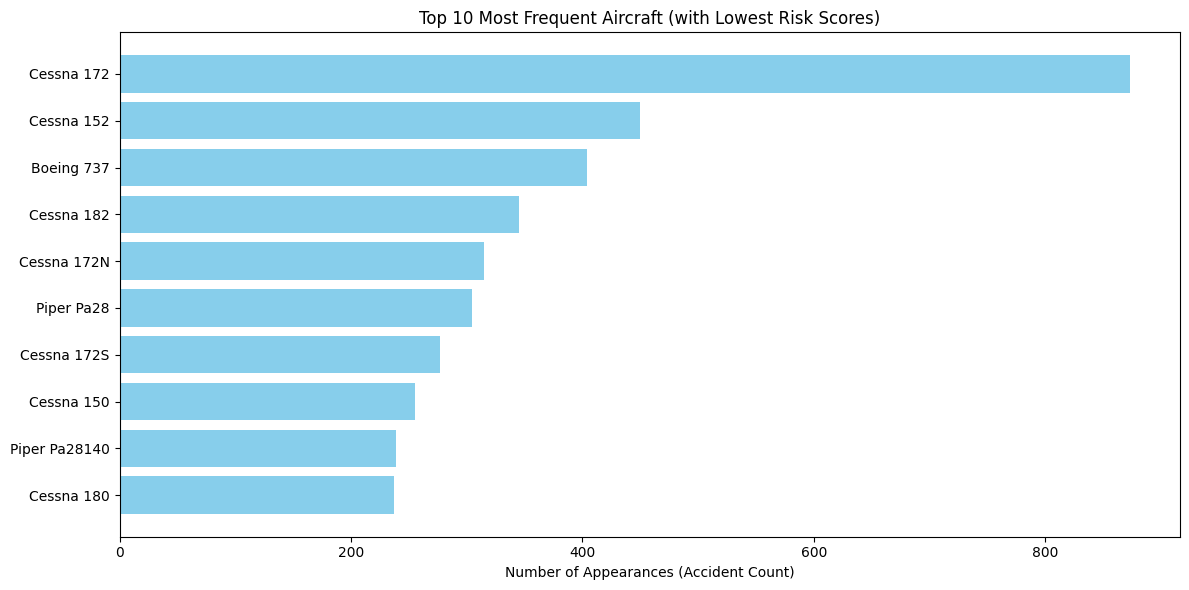

In [21]:
# Top 20 aircraft with the lowest risk scores but high frequency of appearances in the dataset.

# Take top 10 from the sorted DataFrame
top10_high_count_low_risk = high_count_low_risk.head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top10_high_count_low_risk['Aircraft.make.and.model'], top10_high_count_low_risk['Appearance_Count'], color='skyblue')
plt.xlabel('Number of Appearances (Accident Count)')
plt.title('Top 10 Most Frequent Aircraft (with Lowest Risk Scores)')
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()


In [22]:
# Step 1: Filter records with "Non-Fatal" injury severity
non_fatal_aircrafts = selected_aviation_data[
    selected_aviation_data['Injury.Severity'] == 'Non-Fatal'
]

# Step 2: Group by aircraft model and count non-fatal incidents
non_fatal_counts = (
    non_fatal_aircrafts
    .groupby(['Aircraft.make.and.model', 'Injury.Severity'])
    .size()
    .reset_index(name='Non_Fatal_Incident_Count')
    .sort_values(by='Non_Fatal_Incident_Count', ascending=False)
)

# Step 3: View top results
non_fatal_counts.head(10)

,Aircraft.make.and.model,Injury.Severity,Non_Fatal_Incident_Count
1843,Cessna 172,Non-Fatal,728
1831,Cessna 152,Non-Fatal,395
1239,Boeing 737,Non-Fatal,385
1871,Cessna 172N,Non-Fatal,262
1906,Cessna 182,Non-Fatal,261
1878,Cessna 172S,Non-Fatal,251
5301,Piper Pa28,Non-Fatal,234
1890,Cessna 180,Non-Fatal,224
1817,Cessna 150,Non-Fatal,208
5308,Piper Pa28140,Non-Fatal,187


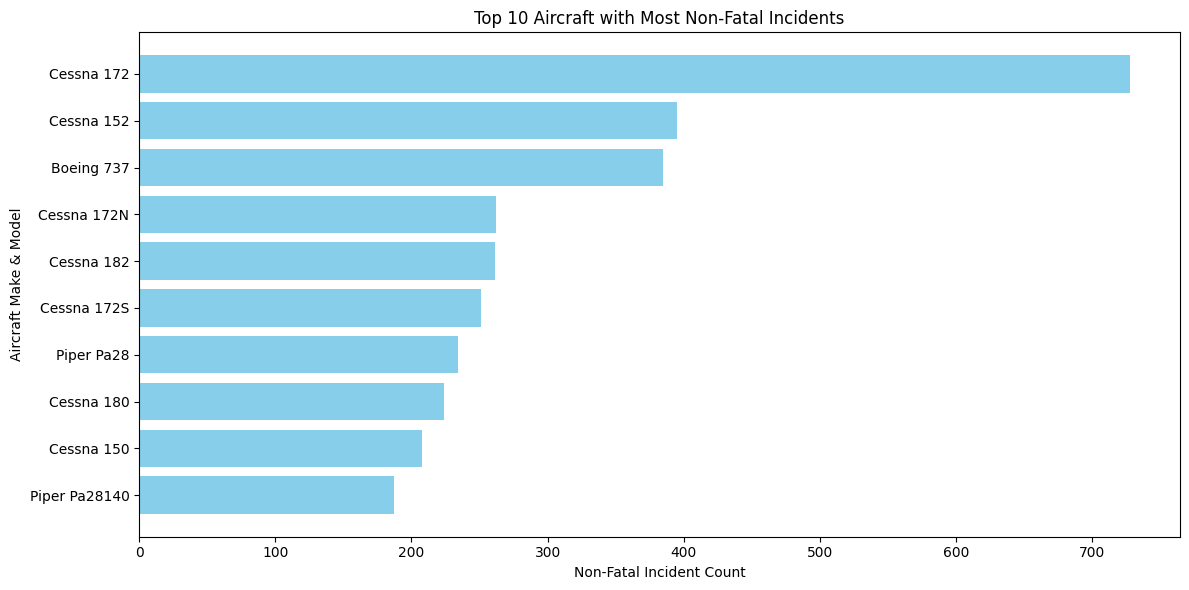

In [23]:
# Step 4: Plot top 10 aircraft models with highest Non-Fatal incidents
top_non_fatal = non_fatal_counts.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_non_fatal['Aircraft.make.and.model'], top_non_fatal['Non_Fatal_Incident_Count'], color='skyblue')
plt.xlabel('Non-Fatal Incident Count')
plt.ylabel('Aircraft Make & Model')
plt.title('Top 10 Aircraft with Most Non-Fatal Incidents')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

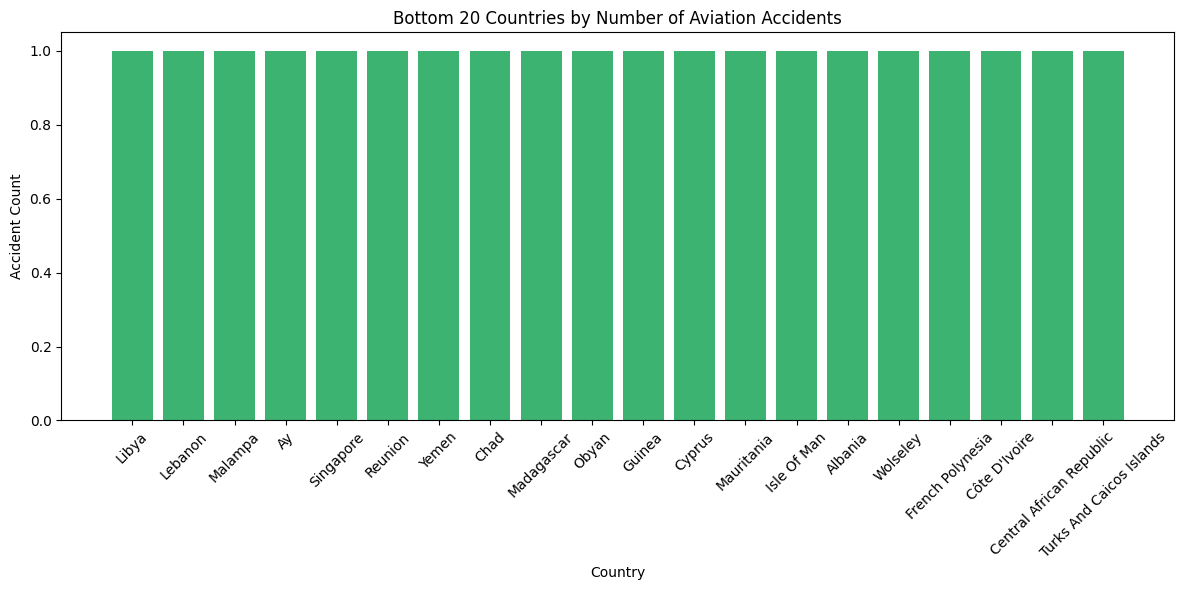

In [24]:
# Country with the lowest incidents and accidents
accidents_by_country = selected_aviation_data['Country'].value_counts().reset_index()
accidents_by_country.columns = ['Country', 'Accident_Count']

# Get bottom 20 countries with the fewest accidents
bottom_countries = accidents_by_country.tail(20).sort_values(by='Accident_Count', ascending=True)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(bottom_countries['Country'], bottom_countries['Accident_Count'], color='mediumseagreen')
plt.title('Bottom 20 Countries by Number of Aviation Accidents')
plt.xlabel('Country')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


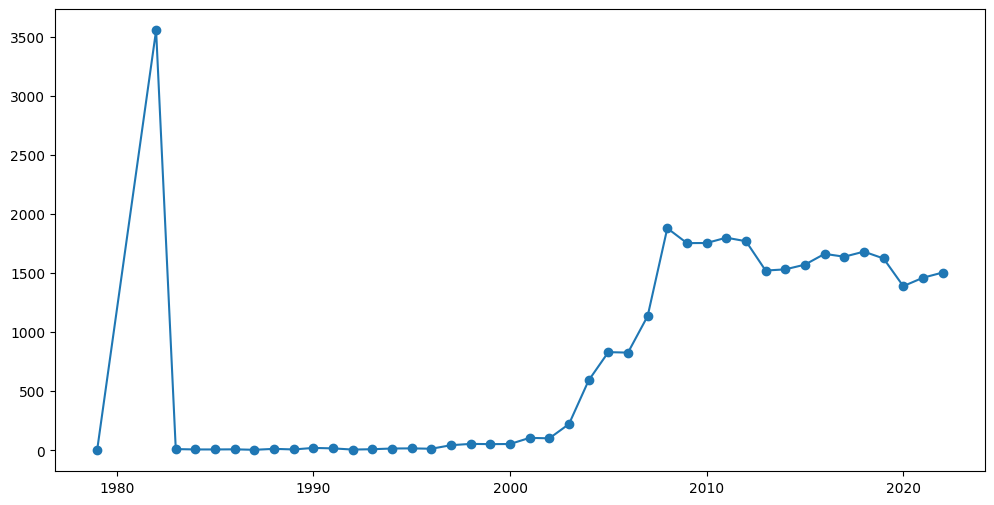

In [25]:
# Identify the trend of accidents over the years
accidents_by_year = selected_aviation_data['Event_Year'].value_counts().reset_index()
accidents_by_year.columns = ['Event_Year', 'Accident_Count']

# Step 2: Sort by year
accidents_by_year = accidents_by_year.sort_values('Event_Year')

# Step 3: Plot with color
plt.figure(figsize=(12, 6))
plt.plot(
    accidents_by_year['Event_Year'], 
    accidents_by_year['Accident_Count'], 
    marker='o', 
    linestyle='-', 
    color='#1f77b4',              
    label='Accidents'
)


In [26]:
# Group by Aircraft.damage and count occurrences
aircraft_damage_status = (
    selected_aviation_data['Aircraft.damage']
    .value_counts(dropna=False)  # include NaN if you want to see missing data too
    .reset_index()
    .rename(columns={'index': 'Aircraft.Damage', 'Aircraft.damage': 'Count'})
)

# Preview the result
print(aircraft_damage_status)


         Count  count
0  Substantial  26841
1    Destroyed   4217
2        Minor   1098
3      Unknown    119


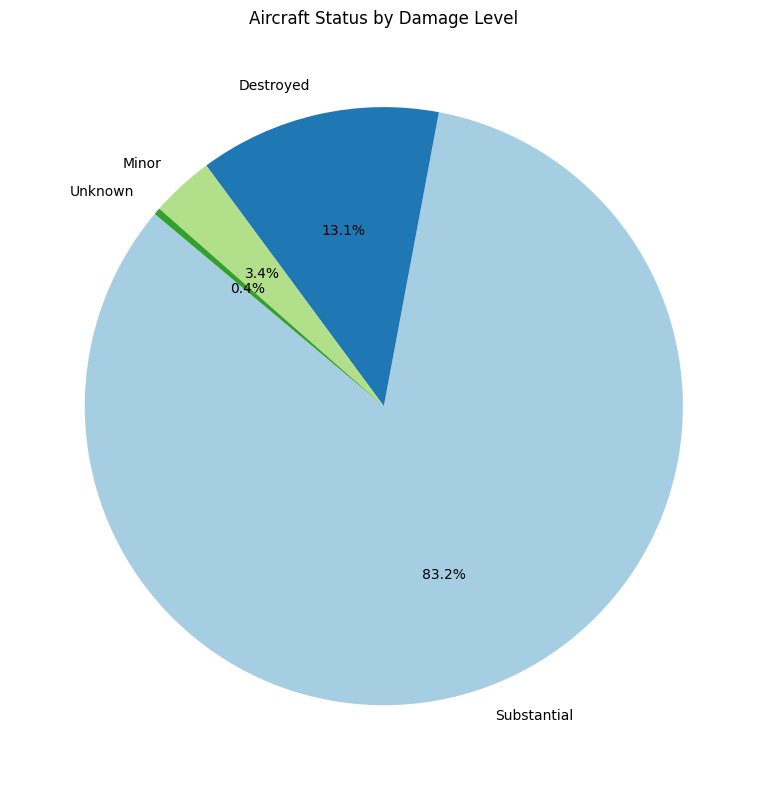

In [27]:
# Draw a pie chart to understand the state of  aircraft once an accident or incident occurs

# Ensure your columns are correctly named
aircraft_damage_status.columns = ['Damage_Status', 'Count']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    aircraft_damage_status['Count'],
    labels=aircraft_damage_status['Damage_Status'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

# Title
plt.title('Aircraft Status by Damage Level')
plt.tight_layout()
plt.show()

